# Jamboree Education
- Jamboree has established a reputation for helping students excel in standardized tests such as GMAT, GRE, and SAT through unique problem-solving methods.
- The new feature focuses on simplifying decision-making for students by providing a data-driven probability score for Ivy League admissions, targeting Indian aspirants.

# Objective of the case study
- To analyze and enhance the newly launched Ivy League admission predictor feature on Jamboree’s website. 
- The tool estimates a student's probability of getting into an Ivy League college based on their academic and extracurricular credentials.

In [ ]:
# Approach
- Basic Data Analysis
- Exploratory Data Analysis
    - Univariate, Bivariate, Multivariate Analysis
    - Target vs Features
- Statistical Tests
    - Chisquare, Anova Test
- 

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#Load Dataset
path = r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Jamboree\Dataset"
raw_df = pd.read_csv(path + "\Jamboree_Admission.csv")
raw_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Analysis

In [3]:
#Statistics of Dataset
raw_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Inference:
- **Serial No.**: Unique values
- **GRE Score**: 
    - Ranges from 290 to 340
    - Mean ~= Median
- **TOEFL Score**: 
    - Ranges from 92 to 120
    - Mean ~= Median
- **University Rating**: 
    - Ranges from 1 to 5
    - Discrete values (Categorical)
- **SOP**: `Statement of Purpose`
    - Ranges from 1 to 5
- **LOR**: `Letter of Recommendation`
    - Ranges from 1 to 5
- **CGPA**: `Cumulative Grade Point Average`
    - Ranges from 6.8 to 9.92
- **Research**: `Experience in Research`
    - Binary Feature
- **Change of Admit**: `Probability of getting Admission`
    - Ranges from 0 to 1   

In [4]:
#Characteristics of Dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Inference:
- **No Null Values** in the dataset
- **All are numerical** variables

In [9]:
raw_df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### Inference:
- All unique values in Serial No.
- Discrete Variables: **University Rating**, **SOP**, **LOR**, Research
- Continuous Variables: **GRE Score**, **TOEFL Score**, **CGPA**, **Chance of Admit**

# Exploratory Data Analysis
- Univariate Analysis
    - Categorical: *Frequency and Proportion Plots*
    - Numerical: *Distribution and Box plots*
    - *Skewness and Kurtosis*
- Bivariate Analysis
- Multivariate Analysis

## Univariate Analysis

In [75]:
def univariate_plot(df, feature):
    plt.figure(figsize=(12,4))   
    if df[feature].nunique() < 10:
        # Categorical Feature 
        plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
        plt.subplot(1,2,1)
        sns.countplot(data=df, x=feature) 
        plt.subplot(1,2,2)
        labels = df[feature].value_counts().index
        plt.pie(x=list(df[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
        plt.show()
    else:
        # Numerical Feature
        plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
        plt.subplot(1,2,1)
        sns.histplot(df[feature], kde=True, bins=20)
        plt.subplot(1,2,2)
        sns.boxplot(df[feature])
        plt.xlabel(feature)

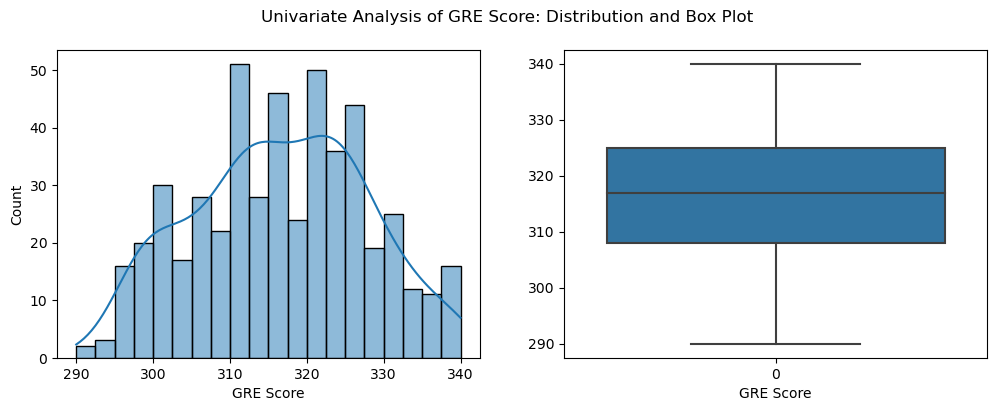

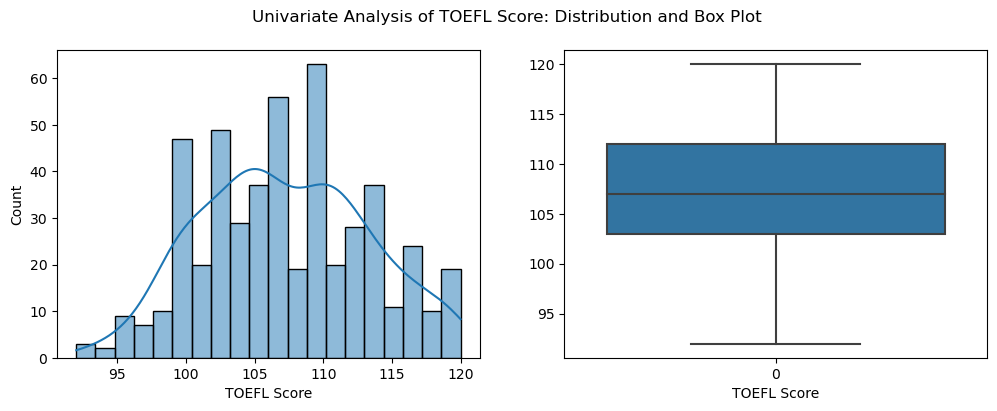

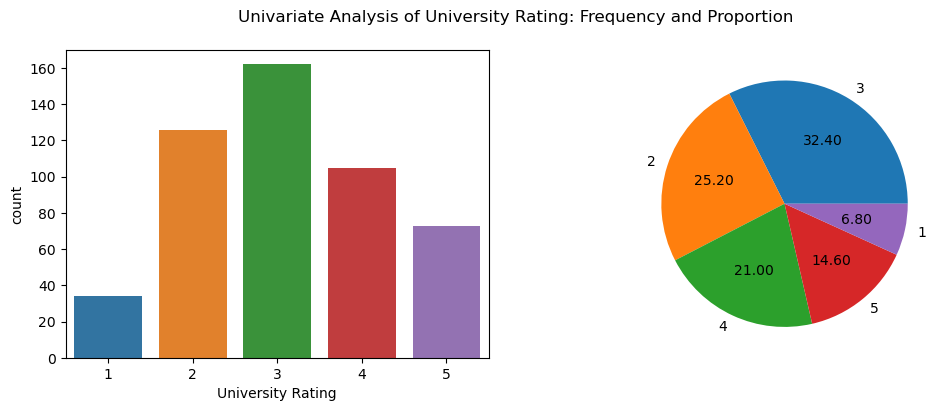

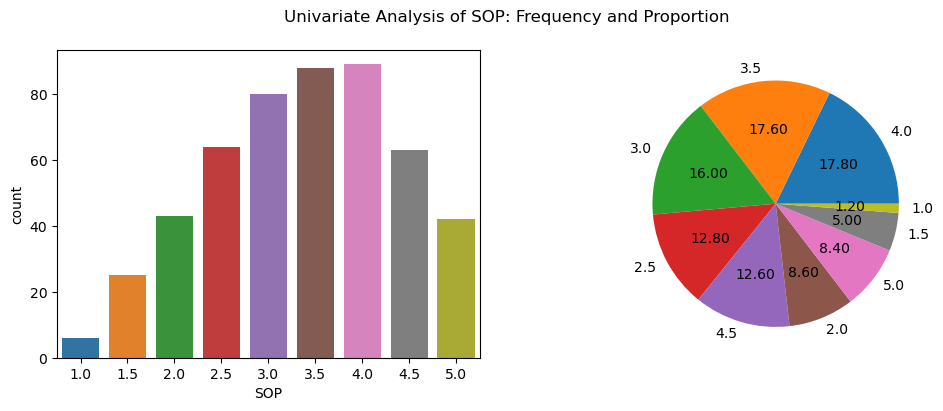

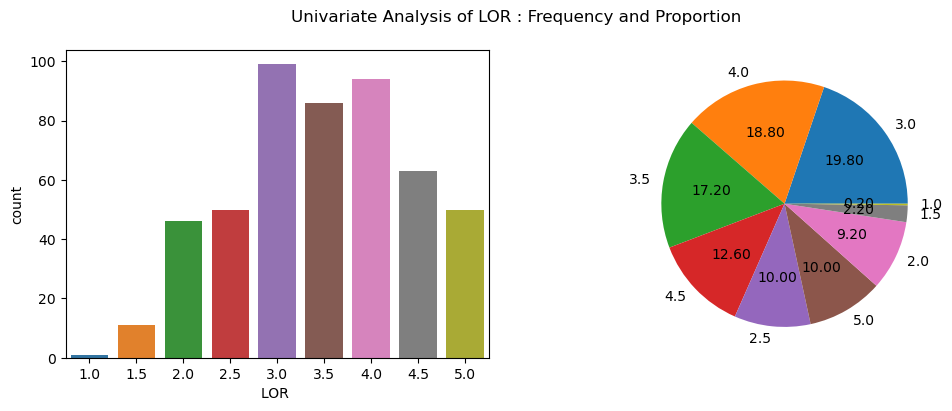

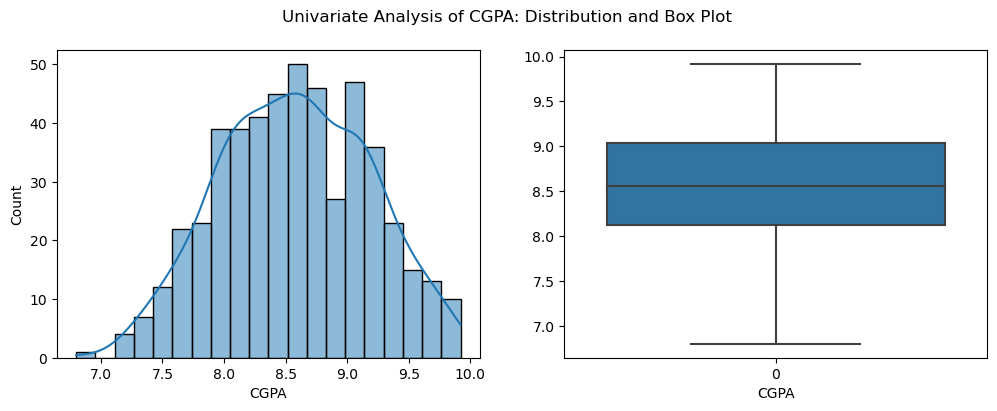

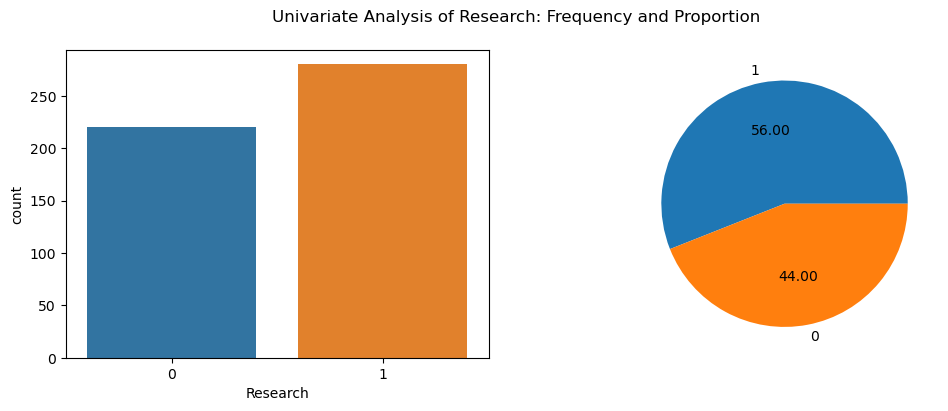

In [76]:
features = list(raw_df.columns)[1:-1]
for feature_name in features:
    univariate_plot(raw_df, feature_name)

### Inference:
- GRE Score, TOEFL Score:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and spread out or flat peak
    - No missing range in the data as there are no gaps observed
- CGPA:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and sharp peak
    - Gap between 7 and 7.5 indicating the missing range in the data
- University Rating:
    - Ratings in the range 2-4 being 80% of proportion
    - Average rating (3) being the top most
- SOP Strength:
    - Strength in the range 2.5-4.5 being 80% of proportion
    - Average Strength (3.5 and 4.5) being the top most  
    - Lowest strength is neglegible (1.2%)
- LOR Strength:
    - Strength in the range 3-4 being ~60% of proportion
    - Average Strength (3) being the top most
    - Lowest strength is neglegible (0.2%)
- Research:
    - Almost equally distributed

In [78]:
skew_list = []
kurt_list = []
for feature in features:
    skew_list.append(np.round(skew(raw_df[feature]),2))
    kurt_list.append(np.round(kurtosis(raw_df[feature]),2))
pd.DataFrame(data=[skew_list, kurt_list], index = ['Skew', 'Kurtosis'], columns=features)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Skew,-0.04,0.10,0.09,-0.23,-0.14,-0.03,-0.24
Kurtosis,-0.72,-0.66,-0.81,-0.71,-0.75,-0.57,-1.94


### Inference:
- **GRE score** and **CGPA** are almost **symmetric**
- **TOEFL Score and University Rating** are slightly **right skewed** indicating the minimal outliers on the right side 
- **SOP, LOR and Research** are **left skewed** indicating the presence of outliers on the left side 

## Bivariate Analysis
- Categorical Vs Categorical Feature
- Numerical Vs Numerical Feature
- Categorical Vs Numerical Feature

In [251]:
num_features = [feature for feature in features if raw_df[feature].nunique() > 10]
cat_features = [feature for feature in features if raw_df[feature].nunique() <= 10]

### Categorical Feature Analysis

In [95]:
def bivariateplot1xn(df, cat_features, plot_feature):
    plt.figure(figsize=(12,4))
    n = len(cat_features)-1
    plt_count = 1
    for feature in cat_features:
        if plot_feature != feature:
            plt.suptitle(plot_feature + " vs Other features")
            plt.subplot(1,n,plt_count)
            sns.countplot(data=df[cat_features], x=feature, hue=plot_feature)
            plt_count += 1

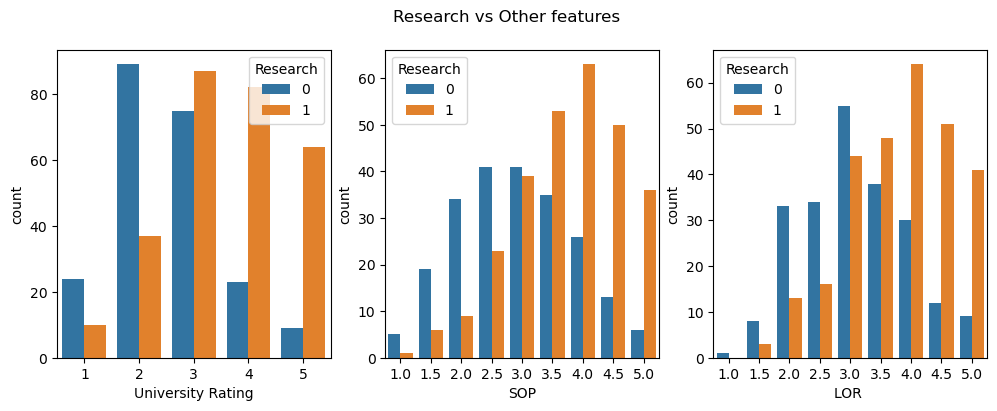

In [96]:
bivariateplot1xn(raw_df, cat_features, 'Research')

#### Inference:
- Students from universities with higher ratings (3+) are more likely to have research experience
- Students having research experience are more likely to have higher SOP and LOR strengths (3+)

<Axes: xlabel='LOR ', ylabel='University Rating'>

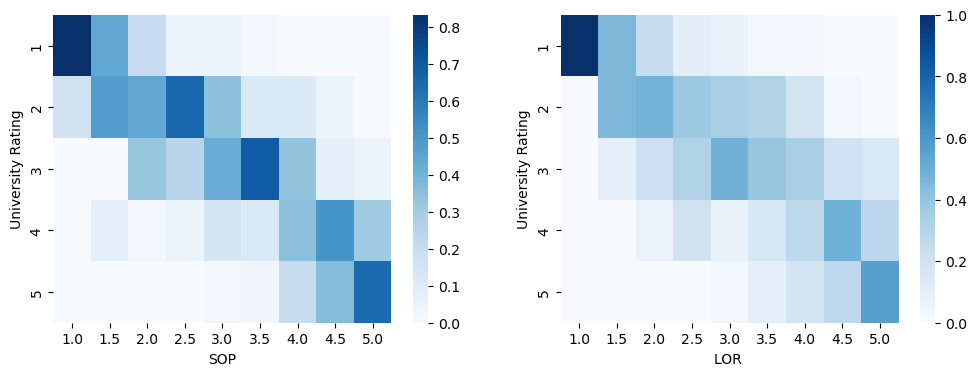

In [121]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ct = pd.crosstab(raw_df['University Rating'], raw_df['SOP'], normalize='columns')
sns.heatmap(ct, cmap='Blues')
plt.subplot(1,2,2)
ct = pd.crosstab(raw_df['University Rating'], raw_df['LOR '], normalize='columns')
sns.heatmap(ct, cmap='Blues')

<Axes: xlabel='LOR ', ylabel='SOP'>

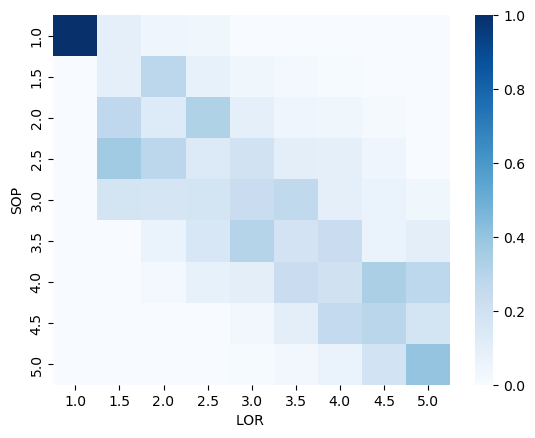

In [122]:
ct = pd.crosstab(raw_df['SOP'], raw_df['LOR '], normalize='columns')
sns.heatmap(ct, cmap='Blues')

#### Inference:
- Diagonal elements indicate a strength of relationship between the categorical features
- Strength of relationship: 
    - (University rating and SOP) > (University rating and LOR) > (SOP and LOR)

### Numerical Feature Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x400 with 0 Axes>

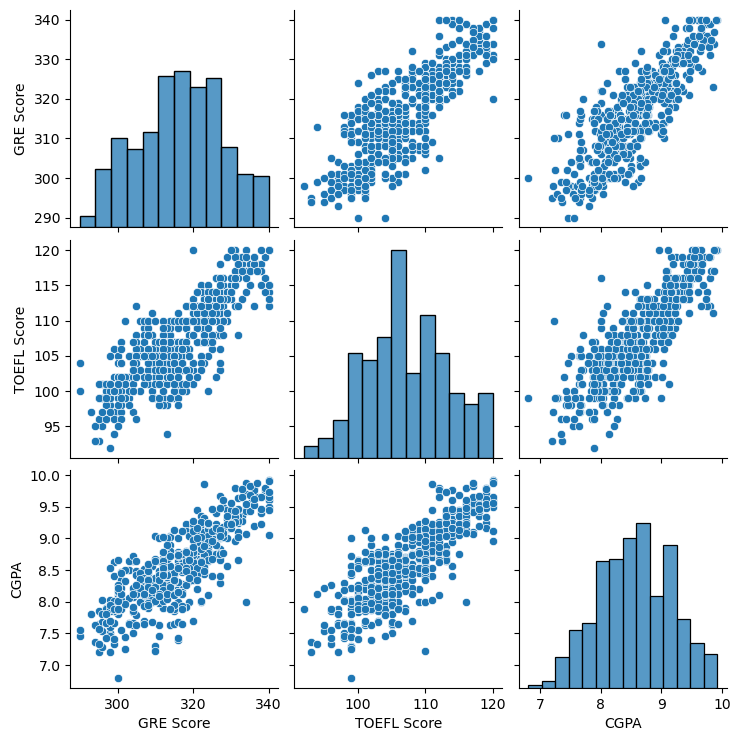

In [86]:
plt.figure(figsize=(12,4))
sns.pairplot(raw_df[num_features])

#### Inference:
- All 3 numerical features are highly linearly correlated
- Students having high CGPA are more likely to have higher GRE and TOEFL Score

### Categorical Vs Numerical Features

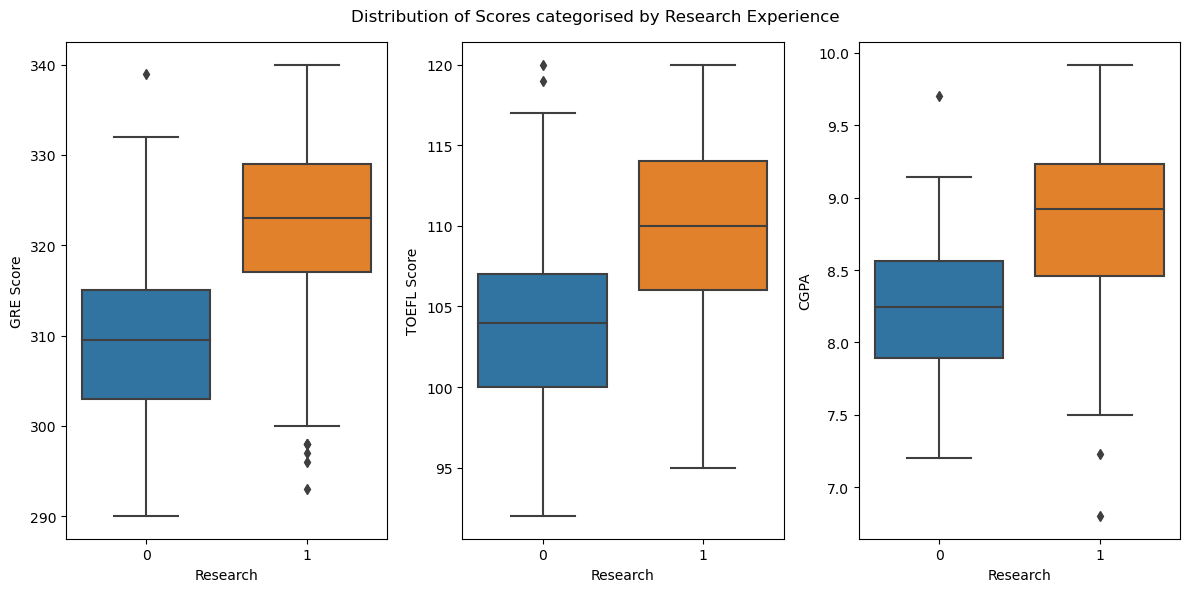

In [138]:
#Research Experience Vs Numerical Features
plt.figure(figsize=(12,6))
plt.suptitle('Statistical distribution of Scores categorised by Research Experience')
plt.subplot(1,3,1)
sns.boxplot(data=raw_df, y= 'GRE Score', x='Research')
plt.subplot(1,3,2)
sns.boxplot(data=raw_df, y= 'TOEFL Score', x='Research')
plt.subplot(1,3,3)
sns.boxplot(data=raw_df, y= 'CGPA', x='Research')
plt.tight_layout()

#### Inference:
- Students having research experience are mostly likely to get higher scores in GRE, TOEFL and Curriculum
- Very few outliers are observed indicating the need for outlier treatment on the dataset

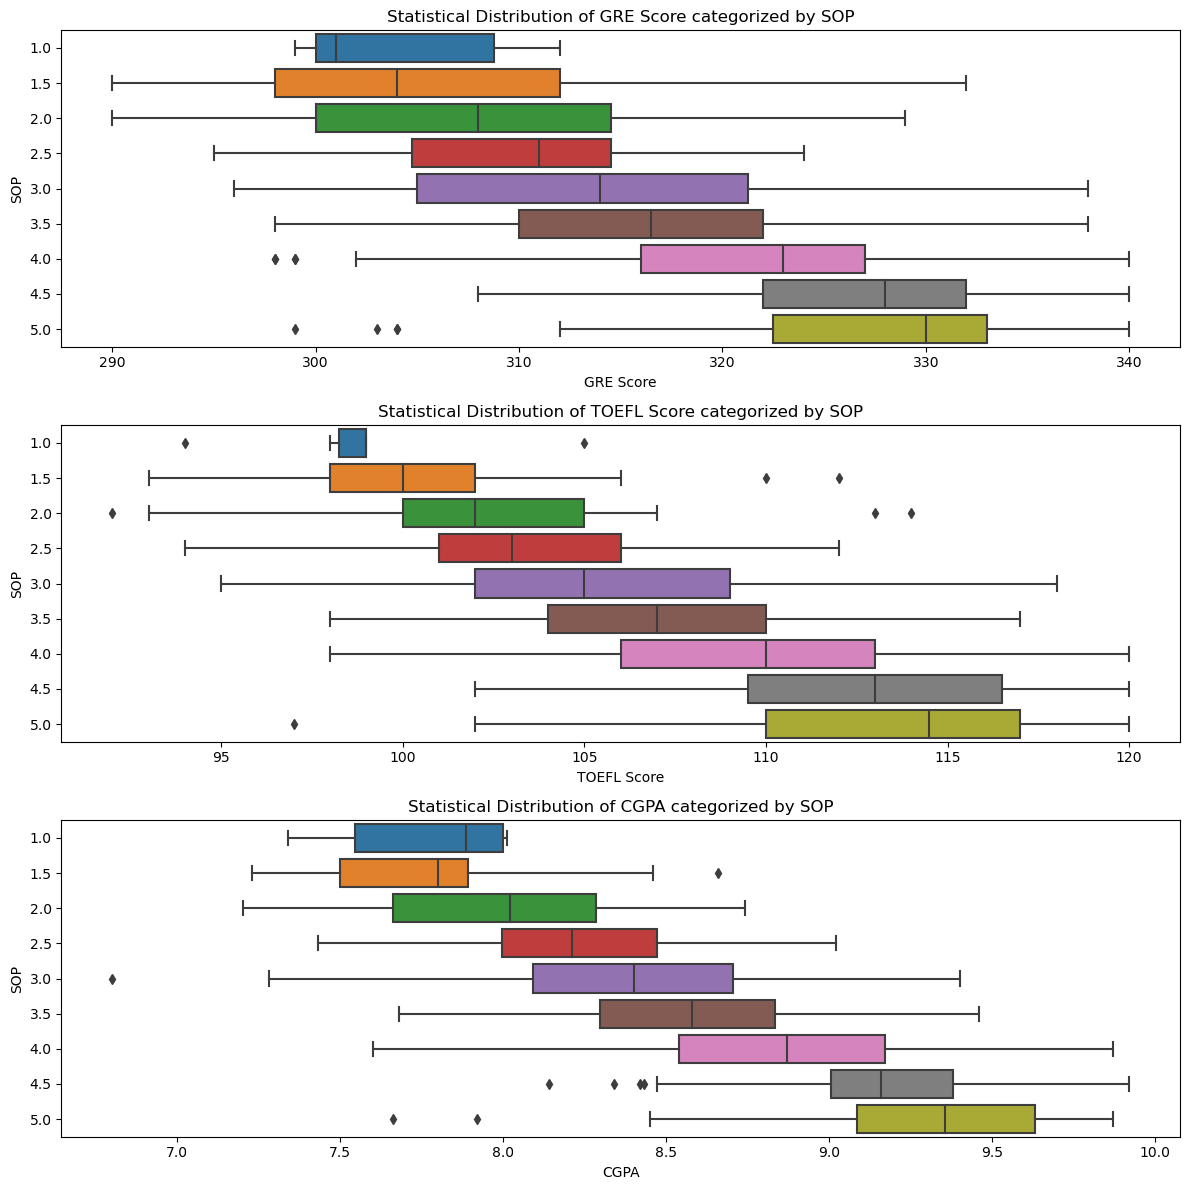

In [139]:
#SOP Vs Numerical Features
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(data=raw_df, x= 'GRE Score', y='SOP', orient='h')
plt.title("Statistical Distribution of GRE Score categorized by SOP")
plt.subplot(3,1,2)
sns.boxplot(data=raw_df, x= 'TOEFL Score', y='SOP', orient='h')
plt.title("Statistical Distribution of TOEFL Score categorized by SOP")
plt.subplot(3,1,3)
sns.boxplot(data=raw_df, x= 'CGPA', y='SOP', orient='h')
plt.title("Statistical Distribution of CGPA categorized by SOP")
plt.tight_layout()

#### Inference:
- Clear trend is evident between SOP and Scores
- Students scored more in the GRE, TOEFL and Curriculum are having higher SOP strength

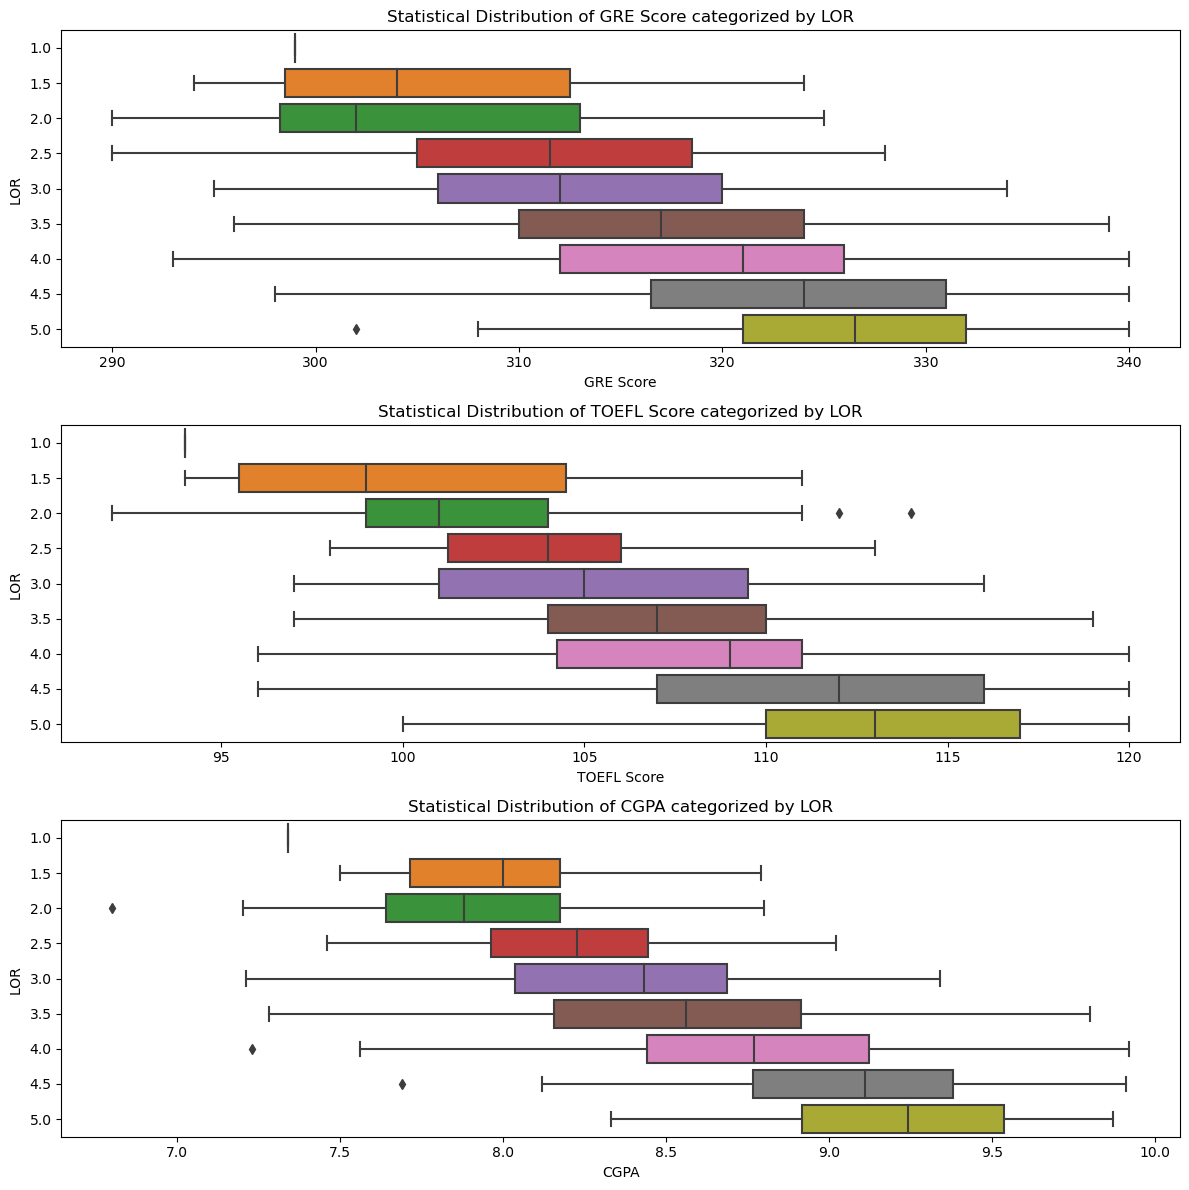

In [140]:
#LOR Vs Numerical Features
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(data=raw_df, x= 'GRE Score', y='LOR ', orient='h')
plt.title("Statistical Distribution of GRE Score categorized by LOR")
plt.subplot(3,1,2)
sns.boxplot(data=raw_df, x= 'TOEFL Score', y='LOR ', orient='h')
plt.title("Statistical Distribution of TOEFL Score categorized by LOR")
plt.subplot(3,1,3)
sns.boxplot(data=raw_df, x= 'CGPA', y='LOR ', orient='h')
plt.title("Statistical Distribution of CGPA categorized by LOR")
plt.tight_layout()

#### Inference:
- Clear trend is evident between LOP and Scores
- Students scored more in the GRE, TOEFL and Curriculum are having higher LOR strength
- Grouping the categories can provide more insights

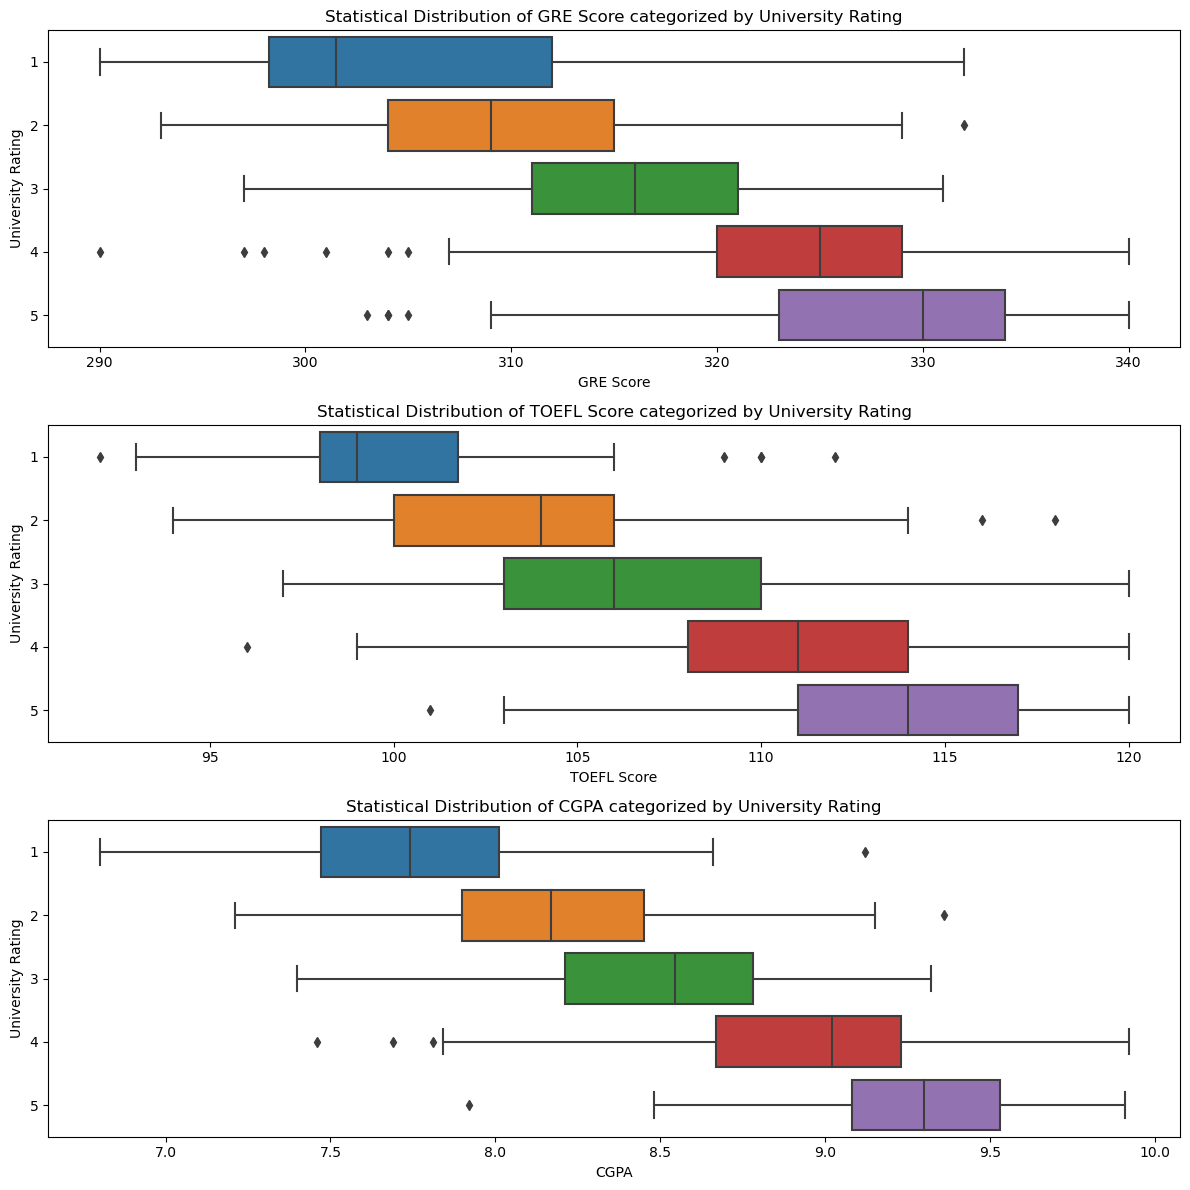

In [141]:
#University Rating Vs Numerical Features
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(data=raw_df, x= 'GRE Score', y='University Rating', orient='h')
plt.title("Statistical Distribution of GRE Score categorized by University Rating")
plt.subplot(3,1,2)
sns.boxplot(data=raw_df, x= 'TOEFL Score', y='University Rating', orient='h')
plt.title("Statistical Distribution of TOEFL Score categorized by University Rating")
plt.subplot(3,1,3)
sns.boxplot(data=raw_df, x= 'CGPA', y='University Rating', orient='h')
plt.title("Statistical Distribution of CGPA categorized by University Rating")
plt.tight_layout()

#### Inference:
- Clear steep trend is evident between University Rating and Scores
- Students scored more in the GRE, TOEFL and Curriculum are from highly rated universities
- Grouping the categories can provide more insights

## Multivariate Analysis
- All 3 Numerical Feature
- 1 Numerical vs 3 Categorical Feature  (Binned)

In [ ]:
df = raw_df.copy()
df['UR_Binned'] = pd.cut(df['University Rating'], bins = [0,2,3,5], labels=['Low', 'Average', 'High'])
df['SOP_Binned'] = pd.cut(df['SOP'], bins = [0,2,3.5,5], labels=['Low', 'Average', 'High'])
df['LOR_Binned'] = pd.cut(df['LOR '], bins = [0,2,3.5,5], labels=['Low', 'Average', 'High'])

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

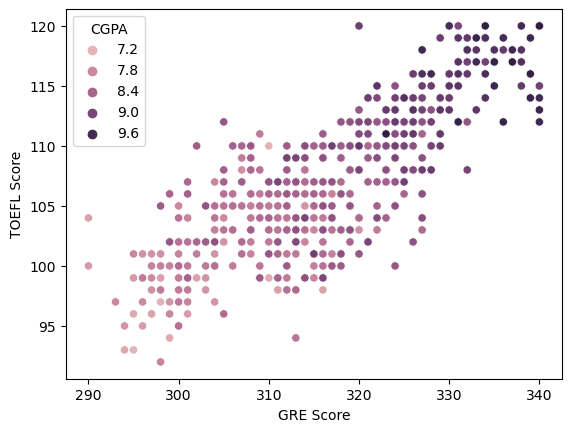

In [143]:
sns.scatterplot(data = df, x = 'GRE Score', y = 'TOEFL Score', hue='CGPA')

## Target Variable Analysis
- UVA of Target 
- BVA with each numerical and categorical features
- Target correlation with Features

### UVA - Target (Chance of Admit)

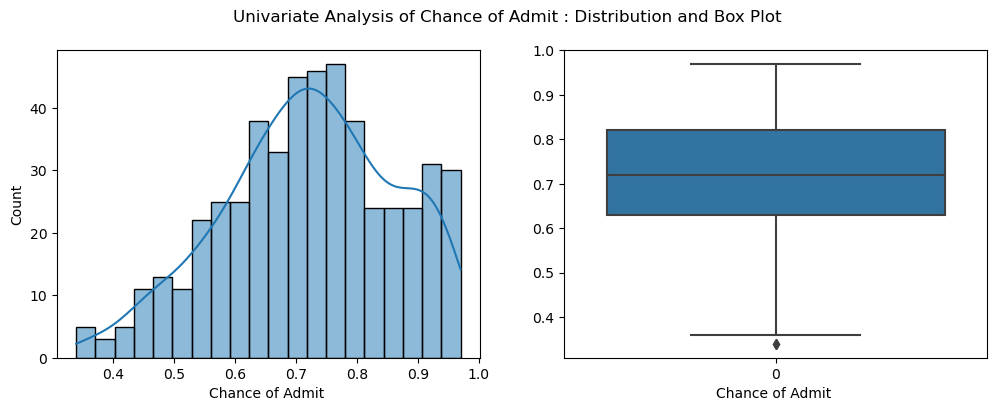

In [232]:
univariate_plot(raw_df, 'Chance of Admit ')

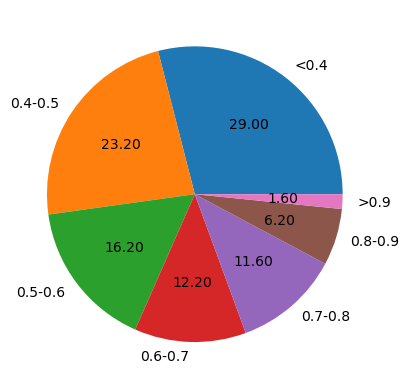

In [243]:
labels = ["<0.4", "0.4-0.5", "0.5-0.6", "0.6-0.7", "0.7-0.8", "0.8-0.9", ">0.9"]
target = pd.cut(raw_df['Chance of Admit '], bins=[0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=labels)
plt.pie(x=list(target.value_counts()), labels=labels, autopct="%0.2f") 
plt.show()

#### Inference:
- Unbalanced dataset with relatively left skewed
- Median is around 0.7
- High confidence results (>0.7) are less <25%
- 0.4 to 0.7 confidence range occupies 50% of dataset

### BVA - Target vs Features

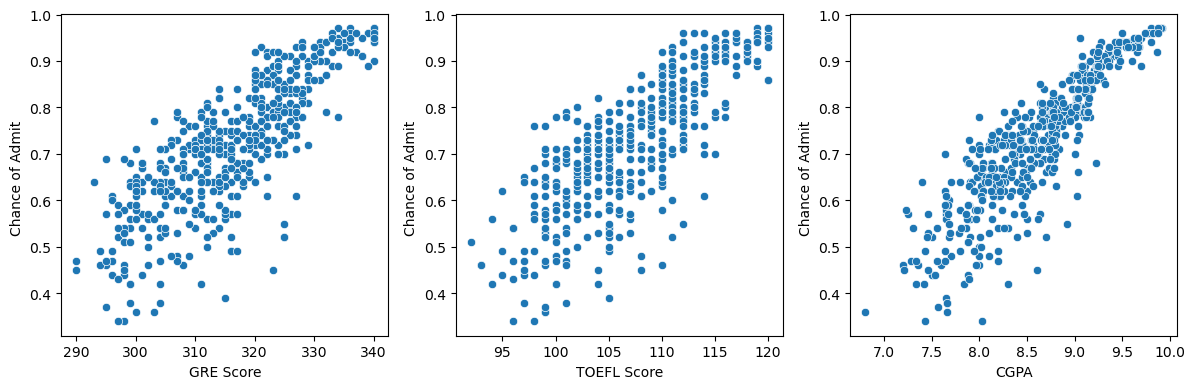

In [222]:
plt.figure(figsize=(12, 4))
for i in range(len(num_features)):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=raw_df[num_features[i]], y = raw_df['Chance of Admit '])
plt.tight_layout()

#### Inference:
- GRE Score, TOEFL Score and CGPA all are linearly correlated with Chance of Admission
- Variance of TOEFL Score > GRE Score > CGPA
- In other words, the range of toefl score is braod for getting an admission 
- Higher the score the higher chance of getting an admission

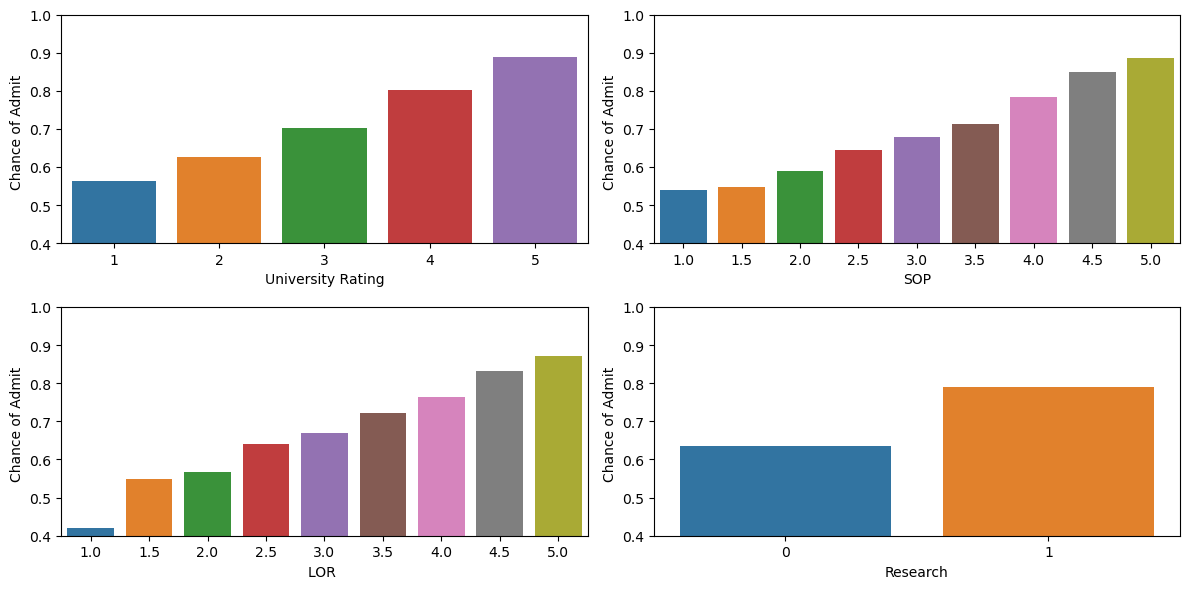

In [228]:
plt.figure(figsize=(12, 6))
for i in range(len(cat_features)):
    plt.subplot(2,2,i+1)
    sns.barplot(data = raw_df, x = cat_features[i], y = 'Chance of Admit ', estimator='mean', errorbar=None)
    plt.ylim(0.4, 1)
plt.tight_layout()

#### Inference:
- University rating, SOP, LOR and Research experience are positively and linearly correlated with Chance of Admission
- Higher the rating the higher the chance of getting an admission

### Feature Correlation with Target

(0.4, 0.9265332036498027)

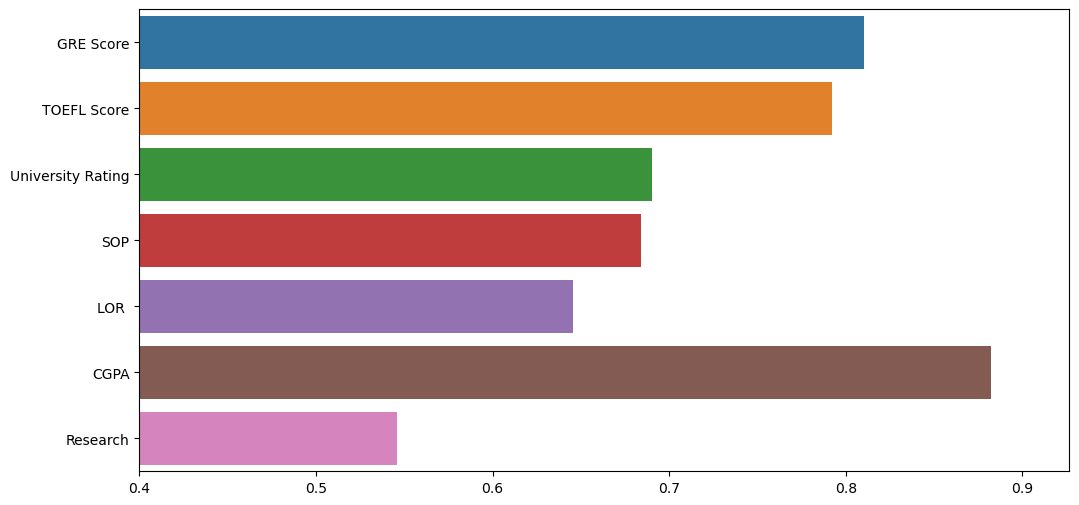

In [300]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(raw_df.drop("Serial No.", axis=1).corr().iloc[-1])[:-1], y=list(raw_df.drop("Serial No.", axis=1).columns)[:-1], orient='h')
plt.xlim(0.4)

#### Inference:
- GRE, TOEFL Score and CGPA are highly correlated with the Target

# Data Preprocessing
- Missing data analysis
- Outlier Treatment if necessary
- Feature Engineering
- Feature Scaling

## Null and Outlier Analysis

In [144]:
raw_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

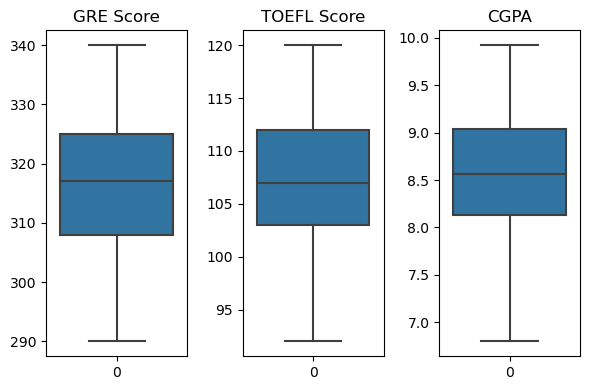

In [153]:
cnt = 1
plt.figure(figsize=(6,4))
for feature in num_features:
    plt.subplot(1, len(num_features), cnt)
    sns.boxplot(raw_df[feature])
    plt.title(feature)
    cnt += 1
plt.tight_layout()

#### Inference:
- No Null values are observed
- No outliers detected in numerical features

<Axes: ylabel='SOP'>

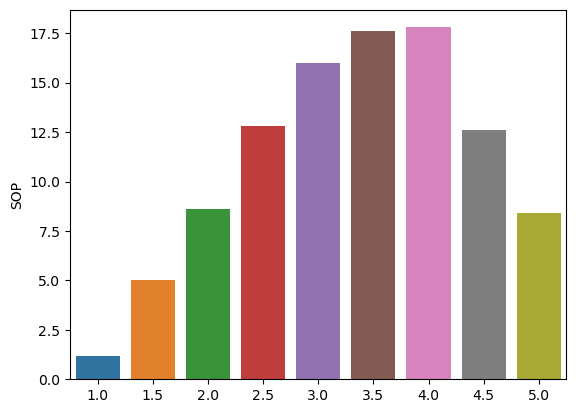

In [160]:
percent_split = (raw_df['SOP'].value_counts()*100/raw_df['SOP'].value_counts().sum()).sort_index()
sns.barplot(y = percent_split, x = percent_split.index)

<Axes: ylabel='LOR '>

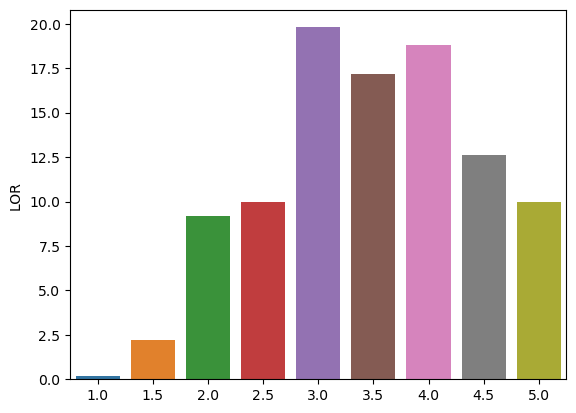

In [162]:
percent_split = (raw_df['LOR '].value_counts()*100/raw_df['LOR '].value_counts().sum()).sort_index()
sns.barplot(y = percent_split, x = percent_split.index)

<Axes: ylabel='University Rating'>

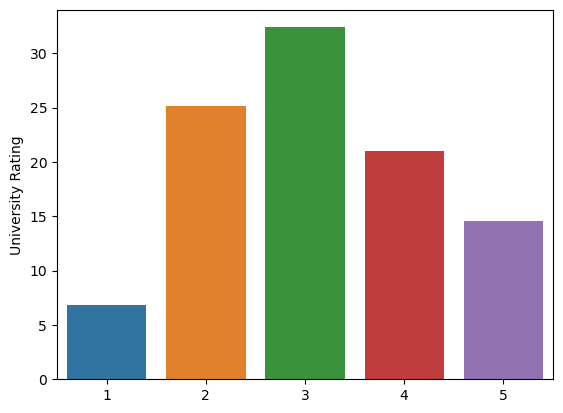

In [164]:
percent_split = (raw_df['University Rating'].value_counts()*100/raw_df['University Rating'].value_counts().sum()).sort_index()
sns.barplot(y = percent_split, x = percent_split.index)

In [165]:
percent_split

1     6.8
2    25.2
3    32.4
4    21.0
5    14.6
Name: University Rating, dtype: float64

#### Inference:
- SOP: 1, 1.5 and 2.0 can be merged, 4.5 and 5.0 can be merged 
- LOR: 1, 1.5, 2.0 and 2.5 can be merged, 4.5 and 5.0 can be merged 
- University Rating: 1 and 2 can be merged, 4 and 5 can be merged 

## Feature Engineering:
- Merge Categories
- PCA
- Feature Scaling

In [168]:
df.drop('Serial No.', axis=1, inplace=True)

In [216]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,3,6,5,9.65,1,0.92
1,324,107,3,5,5,8.87,1,0.76
2,316,104,2,3,3,8.00,1,0.72
3,322,110,2,4,1,8.67,1,0.80
4,314,103,1,1,2,8.21,0,0.65


In [ ]:
def MapElements(df, feature):
    d = dict(map(lambda i, j: (i,j), sorted(df[feature].unique()), np.arange(1, len(df[feature].unique())+1)))
    return df[feature].map(d)

In [190]:
# Bin the elements
df['SOP'] = df['SOP'].apply(lambda x: 2 if x < 2 else (5 if x > 4 else x))
df['LOR '] = df['LOR '].apply(lambda x: 2 if x < 3 else (5 if x > 4 else x))
df['University Rating'] = df['University Rating'].apply(lambda x: 2 if x < 3 else (5 if x > 3 else x))

#Transform or Map the elements
df['SOP'] = MapElements(df, 'SOP')
df['LOR '] = MapElements(df, 'LOR ')
df['University Rating'] = MapElements(df, 'University Rating')

In [213]:
print("Unique values of SOP:", sorted(df['SOP'].unique()))
print("Unique values of LOR:", sorted(df['LOR '].unique()))
print("Unique values of University Rating:", sorted(df['University Rating'].unique()))

Unique values of SOP: [1, 2, 3, 4, 5, 6]
Unique values of LOR: [1, 2, 3, 4, 5]
Unique values of University Rating: [1, 2, 3]


#### Inference:
- University Rating, SOP, LOR are transformed to comparable ordinal data

In [ ]:
## Principal Component Analysis

In [245]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [248]:
n = len(num_features) + len(cat_features)
pl = Pipeline([
    ('Scaling', StandardScaler()),
    ('PCA', PCA(n_components=n))
])

In [254]:
valid_col = num_features + cat_features
pl.fit(raw_df[valid_col])
pca_features = pl.transform(raw_df[valid_col])
pca_model = pl.named_steps['PCA']

Pipeline(steps=[('Scaling', StandardScaler()), ('PCA', PCA(n_components=7))])

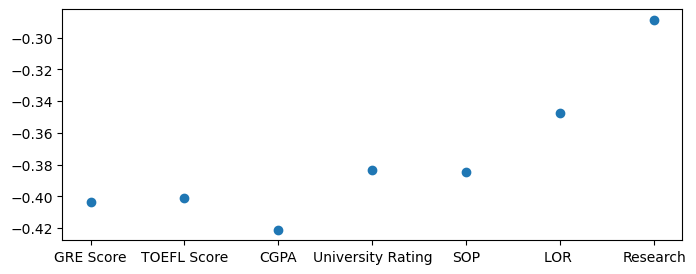

In [305]:
plt.figure(figsize=(8,3))
plt.plot(valid_col, pca_model.components_[0],'o')

#### Inference:
- The first principal component, which explains approximately 65% of the variance in the data, is constructed with nearly equal contributions from all features in the dataset
- Since all the features equally contribute for PC1, all are comparably important in explaining the variance of the dataset

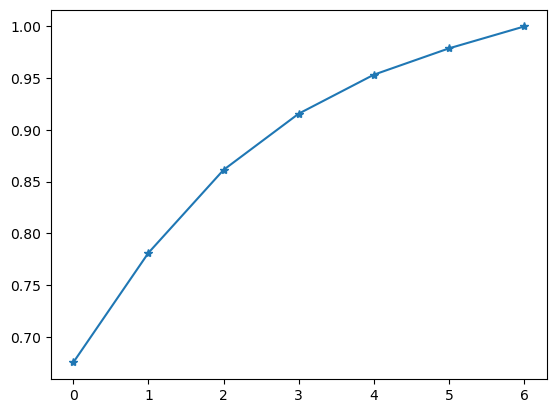

In [261]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker="*")

#### Inference:
- Out of 7 features from the dataset, First 3 principal components captures >85% of variance in data
- Dimensionality reduction is possible with 4 pricipal components as it captures >95% of variance in data

Text(0, 0.5, 'Second Component')

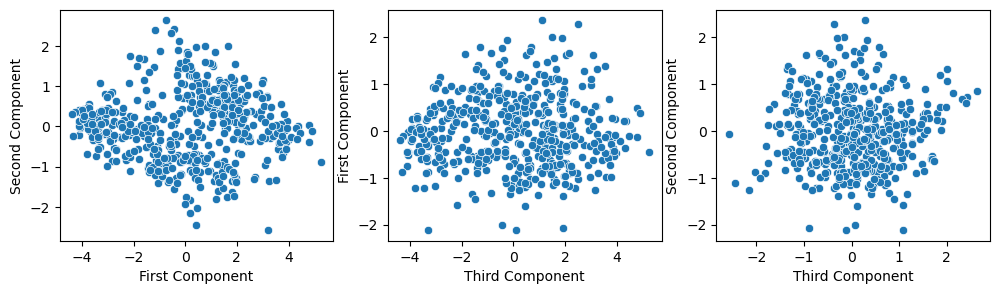

In [274]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.scatterplot(x = pca_features[:, 0], y=pca_features[:, 1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.subplot(1,3,2)
sns.scatterplot(x = pca_features[:, 0], y=pca_features[:, 2])
plt.xlabel("Third Component")
plt.ylabel("First Component")
plt.subplot(1,3,3)
sns.scatterplot(x = pca_features[:, 1], y=pca_features[:, 2])
plt.xlabel("Third Component")
plt.ylabel("Second Component")

# Assumptions of Linear Regression

In [306]:
#Pending

# Modeling
- Train Test Split and Feature Scaling
- Linear Regression
    - Performance Analysis using MAE, MSE and Adj R2 Score
- Polynomial Regression
    - KFold CV and Hyperparameter Tuning
- Lasso Regression
- Ridge Regression

## Data Preparation for Modeling

In [308]:
X = raw_df[num_features + cat_features]
Y = raw_df['Chance of Admit ']

In [307]:
scaler = StandardScaler()

In [314]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)

## Linear Regression

In [315]:
lir = LinearRegression()
lir.fit(xtrain, ytrain)

LinearRegression()

In [316]:
def adj_r2score(r2score, n, k):
    return (1-((r2score-1)*(n-1)/(n-k-1)))

In [327]:
def performance_analysis(ypred, ytrue, model="Linear Regression", k=7):
#     print("Performance analysis of " + model + ":")
#     print("Mean Squared Error: ", round(mean_squared_error(ytrue, ypred),3))
#     print("Mean Absolute Error: ", round(mean_absolute_error(ytrue, ypred),3))
#     print("R2 Score: ", round(r2_score(ytrue, ypred),3))
#     print("Adjusted R2 Score: ", round(adj_r2score(r2_score(ytrue, ypred), len(ypred), k),3))
    return round(mean_squared_error(ytrue, ypred),3),\
            round(mean_absolute_error(ytrue, ypred),3),\
            round(r2_score(ytrue, ypred),3),\
            round(adj_r2score(r2_score(ytrue, ypred), len(ypred), k),3)

In [325]:
performance_analysis(lir.predict(xtest), ytest, "Linear Regression", k=xtrain.shape[1])

Performance analysis of Linear Regression:
Mean Squared Error:  0.004
Mean Absolute Error:  0.044
R2 Score:  0.777
Adjusted R2 Score:  1.24


In [335]:
train_score = performance_analysis(lir.predict(xtrain), ytrain, k=xtrain.shape[1])
test_score = performance_analysis(lir.predict(xtest), ytest, k=xtrain.shape[1])
lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'MSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
lir_res.head()

,MAE,MSE,R2 Score,Adj R2 Score
Train,0.003,0.042,0.830,1.173
Test,0.004,0.044,0.777,1.240
